In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

datafile - имя файла из которого мы хотим брать частоты кодонов

In [29]:
datafile="df_plant.csv"

priority - словарь, содержащий последовательность букв, согласно порядку которых удобнее всего отсортировать кодоны

In [26]:
priority=["A","T","C","G"]

1) Считываем файл с частотами кодонов
2) Вырожденным (соответствующим одной аминокислоте) и стоп - кодонам ( список - unmutable) присваиваем константные значения, чтобы получить нулевой коэффицент корреляции. (так делалось в статье чтобы не акцентировать внимание на этих кодонах)
3) Создаем словарь corr_coef содержащий кодоны и их коэффиценты корреляции с GC3
4) Конвертируем словарь в датафрейм (corr_coef), удаляем коэффицент корреляции для gc_fraction (он не имеет смысла и равен 1)

In [27]:
df=pd.read_csv(datafile, index_col=0)
unmutable=["UGA","UAG","UAA","AUG","UGG"]
for elem in unmutable:
    df[elem]=np.full_like(df[elem],1.0)
corr_coef={key.replace("U","T") : np.corrcoef([df[key],df["gc_fraction"]])[0,1] for key in df.columns}
corr_coef=pd.DataFrame(pd.Series(corr_coef))
corr_coef=corr_coef.drop("gc_fraction")

1) Сортируем кодоны согласно индексу букв в priority, сортированные кодоны записываем в список codon_names
2) Конвертируем датафрейм corr_coef в матрицу, содерщащую коэффиценты корреляций
3) Создаем список из первых двух букв кодонов - ind
4) Создаем датафрейм готовый для подачи в sns.heatmap() из матрицы коэффицентов корреляций и подписей к вертикальным и горизонтальным осям матрицы - ind и priority соответственно

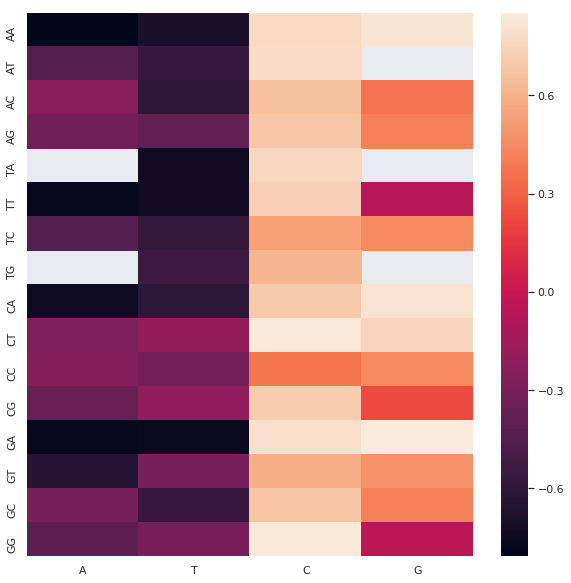

In [28]:
codon_names=sorted(list(corr_coef.index), key=lambda x: priority.index(x[0])*100+priority.index(x[1])*10+priority.index(x[2])*1)
corr_coef=[corr_coef.loc[elem] for elem in codon_names]
corr_coef=np.array(corr_coef).reshape(16,4)
codon_names=np.array(codon_names).reshape(16,4)
ind=[elem[0:2] for elem in codon_names[:,0]]
corr_coef=pd.DataFrame(data=corr_coef, index=ind, columns=priority)
width, height = 10, 10
mpl.rcParams['figure.figsize'] = [width, height]
sns.set()
sns.heatmap(corr_coef)